In [2]:
from Dataset2 import Dataset2
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
train_data = mnist.train.images * 2.0 - 1.0
train_label = mnist.train.labels

batch_size = 200

source_label = 0
target_label = 1

loader = Dataset2(train_data, train_label)
# data = loader.next_batch(batch_size, negative=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def merge(images, size):
    if len(images.shape) == 2:
        shapes = images.shape
        # images = images.reshape( (shapes[0], int( math.sqrt(shapes[1])), int( math.sqrt(shapes[1])) ,1 ) )
        images = images.reshape((shapes[0], 28, 28, 1))

    h, w = images.shape[1], images.shape[2]
    if len(images.shape) == 4 and images.shape[-1] == 3:
        channel = 3
        img = np.zeros((h * size[0], w * size[1], channel))
        for idx, image in enumerate(images):
            i = idx % size[1]
            j = idx // size[1]
            img[j * h:j * h + h, i * w:i * w + w, :] = image

        return img
    else:
        channel = 1
        img = np.zeros((h * size[0], w * size[1]))
        for idx, image in enumerate(images):
            i = idx % size[1]
            j = idx // size[1]
            # if images.shape != 3:
            # image = image.reshape( (28, 28))
            # pdb.set_trace()
            img[j * h:j * h + h, i * w:i * w + w] = image[:, :, 0]
        return img


# f, (left, right) = plt.subplots(1, 2, figsize=(10, 5))

# left.imshow(data[0][0].reshape([28, 28]), cmap=plt.cm.Greys_r)
# right.imshow(data[2][0].reshape([28, 28]), cmap=plt.cm.Greys_r)
# plt.show()

# _, axx = plt.subplots(1, 2, figsize=(10, 20))

# for ax, cls in zip(axx, [0, 2]):
#     imgs = merge(data[cls][:100], [10, 10])
#     ax.imshow(imgs, cmap=plt.cm.Greys_r)
# plt.show()

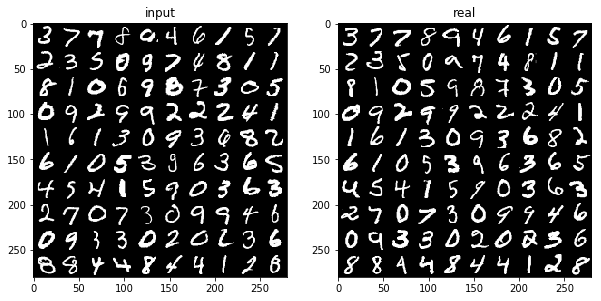

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]


In [4]:
import matplotlib.pyplot as plt
loader = Dataset2(train_data, train_label)
data, label, target = loader.next_batch(batch_size)
source_imgs = merge(data[:100], [10, 10])
target_imgs = merge(target[:100], [10, 10])

_, axx = plt.subplots(1, 2, figsize=(10, 20))

for ax, imgs, title in zip(axx,
                           [source_imgs, target_imgs],
                           ['input', 'real']):
    ax.imshow(imgs, cmap=plt.cm.Greys_r)
    ax.set_title(title)
plt.show()
print label[:10,:]

In [6]:
def odd_even_labels(labels, one_hot=True):
    """
    Turns digit classes to odd[1]/even[0].
    Returns hot-one encoded labels.
    """
    if one_hot is True:
        labels = np.argmax(labels, axis=1)

    num_samples = labels.shape[0]
    new_labels = np.zeros((num_samples, 2))

    for mod_2 in range(2):
        # new_labels[even, 0] = 1
        # new_labels[odd, 1] = 1
        new_labels[labels % 2 == mod_2, mod_2] = 1

    return new_labels, labels

new_labels, categorical_labels = odd_even_labels(label[:10, :])

print label[:10, :]
print new_labels
print categorical_labels

NameError: name 'label' is not defined

(200, 784)
(50,) (50,)
[10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53 54
 55 56 57 58 59 70 71 72 73 74 75 76 77 78 79 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 40 41 42 43 44
 45 46 47 48 49 60 61 62 63 64 65 66 67 68 69 80 81 82 83 84 85 86 87 88 89]
[10 11 12 13 14 15 16 17 18 19 30 31 32 33 34 35 36 37 38 39 50 51 52 53 54
 55 56 57 58 59 70 71 72 73 74 75 76 77 78 79 90 91 92 93 94 95 96 97 98 99
  0  1  2  3  4  5  6  7  8  9 20 21 22 23 24 25 26 27 28 29 40 41 42 43 44
 45 46 47 48 49 60 61 62 63 64 65 66 67 68 69 80 81 82 83 84 85 86 87 88 89]


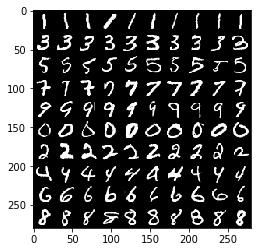

In [14]:
data, label, target = loader.next_batch(batch_size)
import numpy as np
import matplotlib.pyplot as plt
categorical_labels = np.argmax(label, axis=1)


print data.shape

fake_samples = [[] for _ in range(loader._num_labels)]
fake_noise = [[] for _ in range(loader._num_labels)]

for lbl in range(loader._num_labels):
    if len(fake_samples[lbl]) < 10:
        idx = np.where(categorical_labels == lbl)[0]
        if idx.shape[0] >= 10:
            selected_idx = idx[:10]
            fake_samples[lbl] = data[selected_idx]
            fake_noise[lbl] = target[selected_idx]

fake_samples = np.reshape(np.array(fake_samples), [100, -1])

all_idx = np.arange(100)
odds = np.where((all_idx / 10) % 2 == 1)[0]
evens = np.where((all_idx / 10) % 2 == 0)[0]
print odds.shape, evens.shape
order = np.concatenate((odds, evens))

print odds
print evens
print order

imgs = merge(fake_samples[order], [10, 10])
plt.imshow(imgs, cmap=plt.cm.Greys_r)
plt.show()